In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading data

In [2]:
initial_df = pd.read_csv(r"C:\Users\YILMAZ\Desktop\machine_learning_2\airline_customer_satisfaction.csv")

In [3]:
#Structure of the loaded dataset
initial_df.head(40)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [4]:
#Structure and datatypes
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [5]:
#In-depth look into categorical columns
initial_df.describe(include = 'object')

,satisfaction,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,satisfied,Loyal Customer,Business travel,Business
freq,71087,106100,89693,62160


In [6]:
#Distribution of the target variable
distribution_target_var = initial_df["satisfaction"].value_counts()
distribution_target_var

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [7]:
#Percentage representation of the distribution
distribution_target_var_percentage = initial_df["satisfaction"].value_counts(normalize=True) * 100
distribution_target_var_percentage

satisfaction
satisfied       54.73283
dissatisfied    45.26717
Name: proportion, dtype: float64

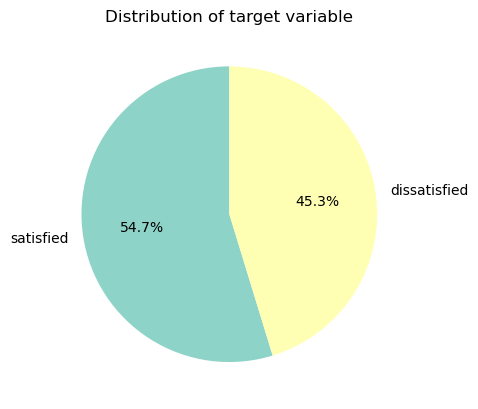

In [8]:
#Visual representation of the distribution
plt.figure()
plt.pie(distribution_target_var_percentage, 
        labels=distribution_target_var_percentage.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors
       )
plt.title('Distribution of target variable')
plt.show()

# 2. 1-5 columns analysis and cleaning

By looking at the dataset it is easy to notice that the majority of columns have the same structure. They contain numbers from 0-5 and indicate the level of satisfaction with certain elements of the service. In the data documentation, the author mentioned that those columns can have values ranging from 1 to 5 (1 being the worst and 5 the best). Taking this information into consideration we decided to treat values 0 in those columns as missing values. Sometimes 0 could mean that the service was unavailable (e.g. Food and drink), hovewer it was impossible to correctly predict in which instances this was really the case and hence, we decided to treat every column in the same manner.

In [9]:
#Filtering the names of the 1-5 columns contained in the dataset
valid_cols = [
    col for col in initial_df.columns
    if set(initial_df[col].dropna().unique()).issubset({0,1,2,3,4,5})
]
print(valid_cols)

['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']


In [10]:
df_1to5 = initial_df[valid_cols]
df_1to5.head(5)

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,0,0,0,3,4,3,4,2,2,0,2,4,2,5


In [11]:
# The distribution of 1-5 columns
counts = df_1to5.apply(lambda x: x.value_counts().sort_index())
print(counts)

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0          4797                               6664            5945   
1         20949                              20828           21076   
2         28726                              22794           27146   
3         29183                              23184           28150   
4         28398                              29593           27216   
5         17827                              26817           20347   

   Gate location  Inflight wifi service  Inflight entertainment  \
0              2                    132                    2978   
1          22565                  14711                   11809   
2          24518                  27045                   19183   
3          33546                  27602                   24200   
4          30088                  31560                   41879   
5          19161                  28830                   29831   

   Online support  Ease of Online booki

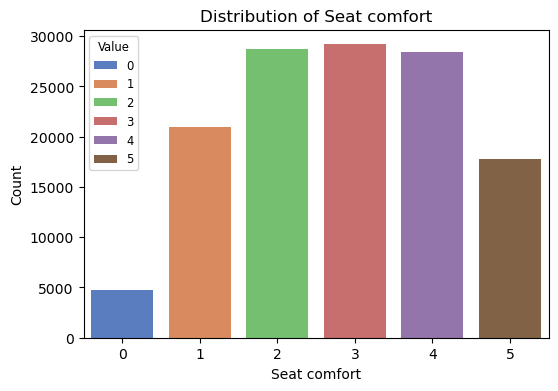

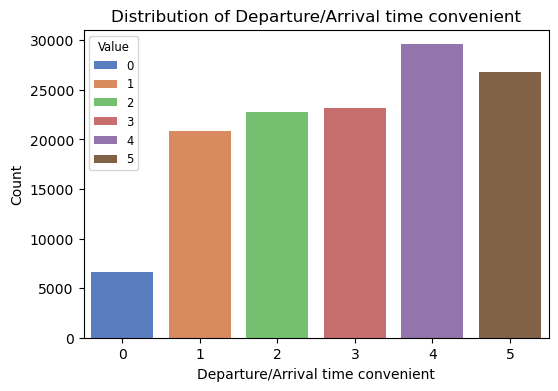

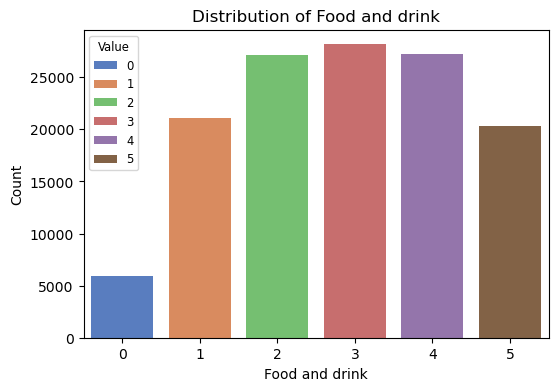

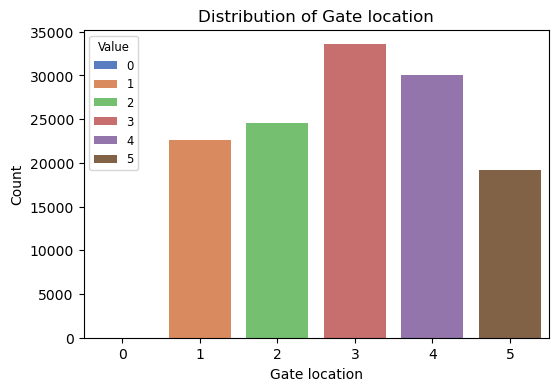

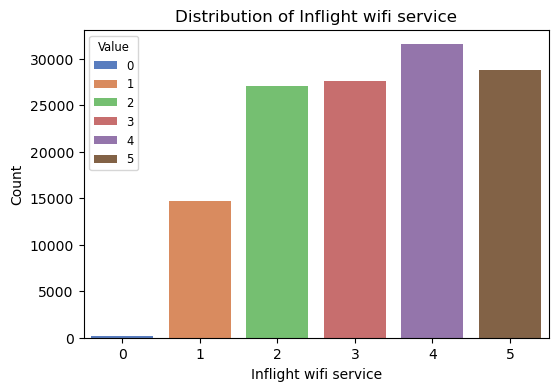

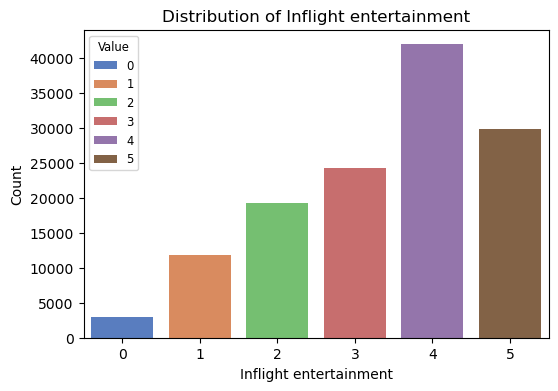

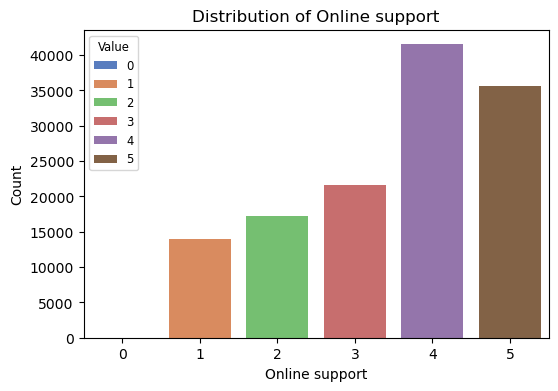

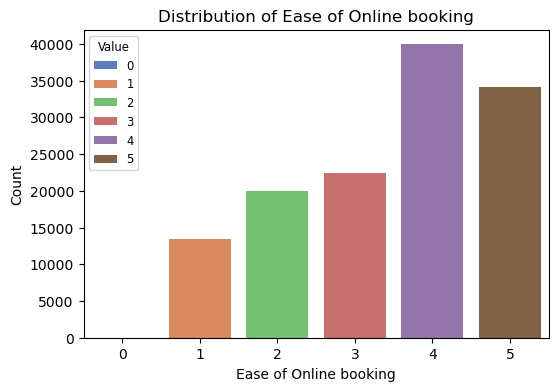

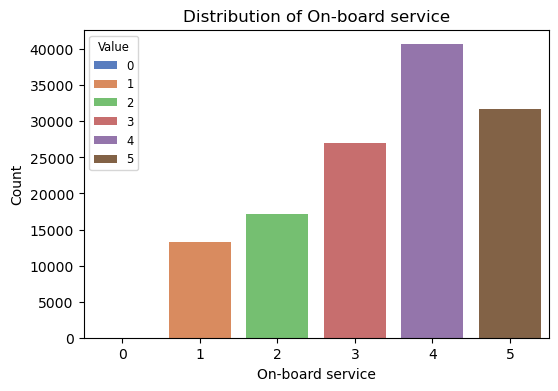

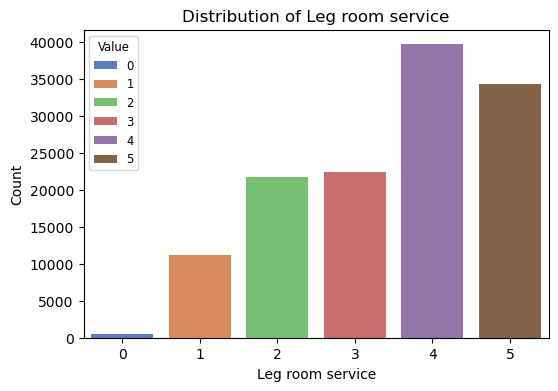

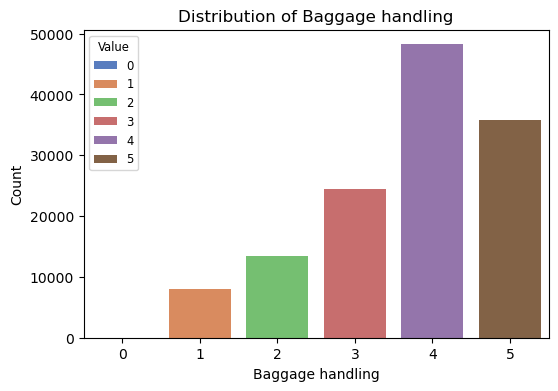

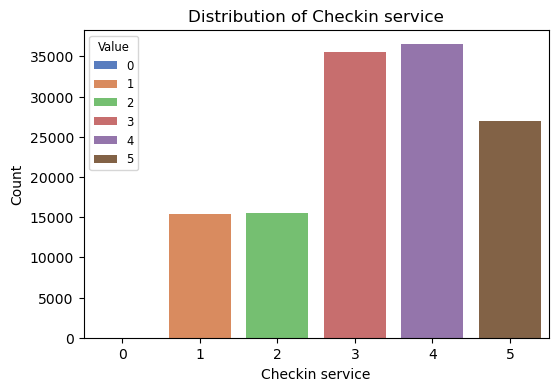

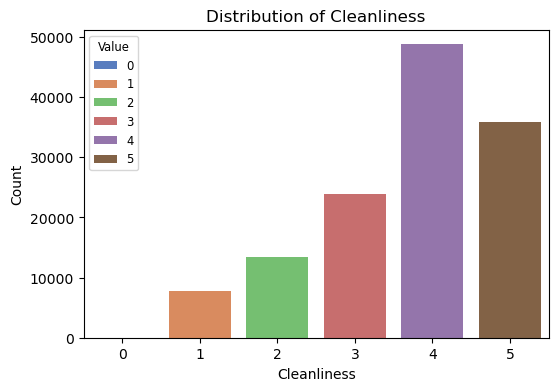

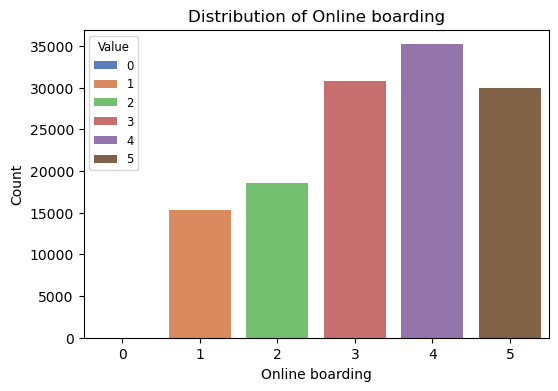

In [12]:
# Visual presentation of the distribution of 1-5 columns

for col in df_1to5:
    plt.figure(figsize=(6,4))
    counts = df_1to5[col].value_counts().reindex(range(6), fill_value=0)
    
    ax = sns.barplot(
        x=counts.index, 
        y=counts.values, 
        hue=counts.index, 
        palette="muted", 
        dodge=False
    )
    ax.legend(title='Value', loc='upper left', fontsize='small', title_fontsize='small')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [13]:
#Checking for Null values other than 0
df_1to5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Seat comfort                       129880 non-null  int64
 1   Departure/Arrival time convenient  129880 non-null  int64
 2   Food and drink                     129880 non-null  int64
 3   Gate location                      129880 non-null  int64
 4   Inflight wifi service              129880 non-null  int64
 5   Inflight entertainment             129880 non-null  int64
 6   Online support                     129880 non-null  int64
 7   Ease of Online booking             129880 non-null  int64
 8   On-board service                   129880 non-null  int64
 9   Leg room service                   129880 non-null  int64
 10  Baggage handling                   129880 non-null  int64
 11  Checkin service                    129880 non-null  int64
 12  Cl

In [14]:
cols_1_to_5 = [
    'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
    'Gate location', 'Inflight wifi service', 'Inflight entertainment',
    'Online support', 'Ease of Online booking', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Cleanliness', 'Online boarding'
]

# Dropping all rows with instances of 0 in 1-5 column
initial_df = initial_df[(initial_df[cols_1_to_5] != 0).all(axis=1)]
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119611 entries, 1037 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       119611 non-null  object 
 1   Customer Type                      119611 non-null  object 
 2   Age                                119611 non-null  int64  
 3   Type of Travel                     119611 non-null  object 
 4   Class                              119611 non-null  object 
 5   Flight Distance                    119611 non-null  int64  
 6   Seat comfort                       119611 non-null  int64  
 7   Departure/Arrival time convenient  119611 non-null  int64  
 8   Food and drink                     119611 non-null  int64  
 9   Gate location                      119611 non-null  int64  
 10  Inflight wifi service              119611 non-null  int64  
 11  Inflight entertainment             119611

In [15]:
#Dropping remaining Null values
initial_df = initial_df.dropna(subset=['Arrival Delay in Minutes'])

In [16]:
#Investigating the distribution of arrival and departure delay
initial_df['Departure Delay in Minutes'].describe()

count    119255.000000
mean         14.824552
std          38.158017
min           0.000000
25%           0.000000
50%           0.000000
75%          12.500000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [17]:
initial_df['Arrival Delay in Minutes'].describe()

count    119255.000000
mean         15.273758
std          38.679817
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [18]:
#Compute 95th percentiles
dep_p95 = initial_df['Departure Delay in Minutes'].quantile(0.95)
arr_p95 = initial_df['Arrival Delay in Minutes'].quantile(0.95)

#Apply winsorisation in order to cap extreme values
initial_df['Departure Delay Winsorized'] = initial_df['Departure Delay in Minutes'].clip(
    upper=dep_p95
)

initial_df['Arrival Delay Winsorized'] = initial_df['Arrival Delay in Minutes'].clip(
    upper=arr_p95
)


In [19]:
initial_df['Departure Delay Winsorized'].describe()

count    119255.000000
mean         11.477749
std          21.186872
min           0.000000
25%           0.000000
50%           0.000000
75%          12.500000
max          77.000000
Name: Departure Delay Winsorized, dtype: float64

In [20]:
initial_df['Arrival Delay Winsorized'].describe()

count    119255.000000
mean         11.898595
std          21.652889
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max          79.000000
Name: Arrival Delay Winsorized, dtype: float64

In [21]:
#Dropping the original columns
initial_df.drop(
    columns=['Departure Delay in Minutes', 'Arrival Delay in Minutes'],
    inplace=True
)

# 3. Exploratory Data Analysis

In this section we performed in-depth analysis of the other columns contained in the dataset such as Age, Customer Type etc. to check for outliers, the spread of the distribution and to get a better idea of analyzed variables

C:\Users\YILMAZ\AppData\Local\Temp\ipykernel_2516\688420970.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=8)


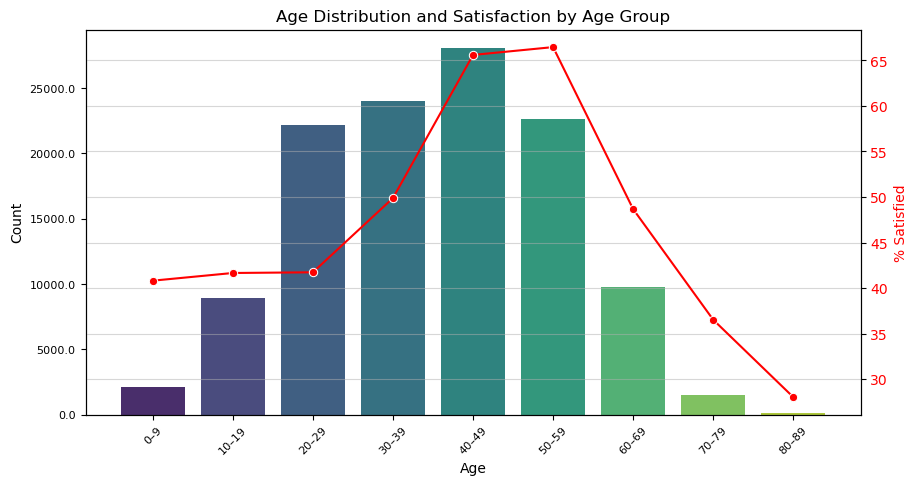

In [22]:
#Bin ages for the sake of visualisation
bins = range(0, initial_df['Age'].max() + 10, 10)
labels = [f"{i}–{i+9}" for i in range(0, initial_df['Age'].max(), 10)]
age_groups = pd.cut(initial_df['Age'], bins=bins, right=False, labels=labels)

#Count per age group
age_group_counts = age_groups.value_counts().sort_index()

#% satisfied per age group
satisfaction_percent = (
    initial_df.assign(is_satisfied=(initial_df['satisfaction'] == 'satisfied').astype(int))
    .groupby(age_groups, observed=True)['is_satisfied']
    .mean()
    .sort_index() * 100
)

fig, ax1 = plt.subplots(figsize=(10,5))

#Bar plot with hue to avoid seaborn deprecation warning
sns.barplot(
    x=age_group_counts.index,
    y=age_group_counts.values,
    hue=age_group_counts.index,
    palette="viridis",
    dodge=False,
    legend=False,
    ax=ax1
)

ax1.set_xlabel("Age")
ax1.set_ylabel("Count")

#Correct tick labels
ax1.set_xticks(range(len(age_group_counts)))
ax1.set_xticklabels(age_group_counts.index, rotation=45, fontsize=8)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=8)

#Line plot for % satisfied
ax2 = ax1.twinx()
sns.lineplot(x=range(len(satisfaction_percent)), y=satisfaction_percent.values, color='red', marker='o', ax=ax2)
ax2.set_ylabel("% Satisfied", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Age Distribution and Satisfaction by Age Group")
plt.grid(True, axis='y', linestyle='-', alpha=0.5)
plt.show()

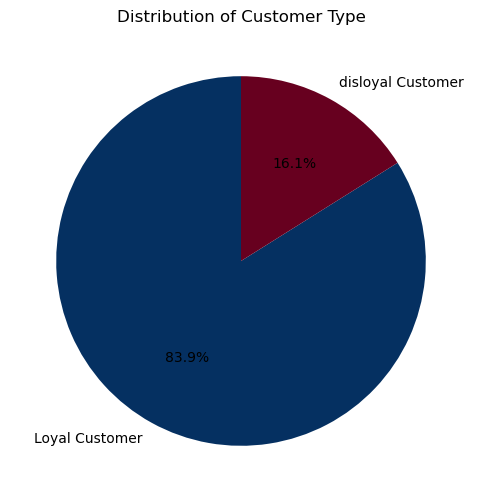

In [23]:
customer_counts = initial_df['Customer Type'].value_counts()

#Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    customer_counts,
    labels=customer_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.RdBu(np.linspace(0, 1, 2))[::-1]
)
plt.title("Distribution of Customer Type")
plt.show()

Based on this simple pie chart we can observe that 84% of airline customers are classified as loyal. While the definition of loyal is not explicitly specified by the creator of this dataset, we can make assumptions that this title is granted to customers who only fly with this specific airline.

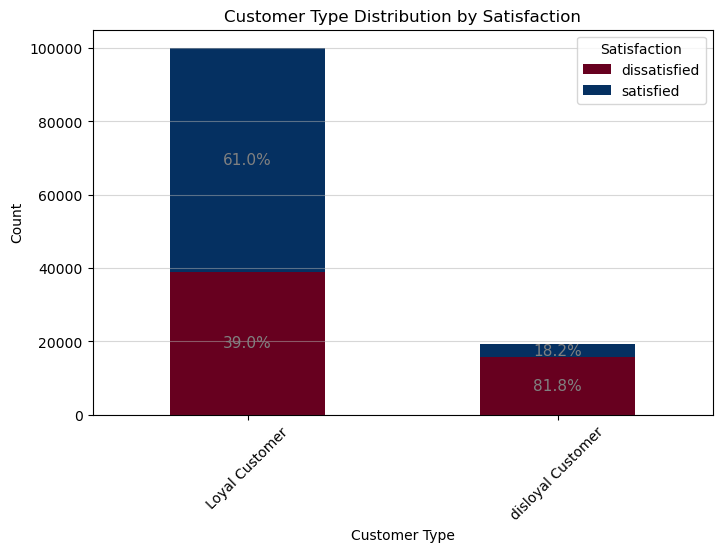

In [24]:
#Count of satisfied vs dissatisfied per Customer Type
customer_satisfaction = (
    initial_df
    .groupby(['Customer Type', 'satisfaction'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)


customer_satisfaction_percent = customer_satisfaction.div(customer_satisfaction.sum(axis=1), axis=0) * 100

colors = plt.cm.RdBu(np.linspace(0, 1, 2))
ax = customer_satisfaction.plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(8,5)
)

plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.title("Customer Type Distribution by Satisfaction")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Satisfaction", fontsize=10)
plt.grid(True, axis='y',alpha=0.5)

for i, customer_type in enumerate(customer_satisfaction.index):
    bottom = 0
    for satisfaction in customer_satisfaction.columns:
        count = customer_satisfaction.loc[customer_type, satisfaction]
        if count > 0:
            percent = customer_satisfaction_percent.loc[customer_type, satisfaction]
            ax.text(
                x=i,
                y=bottom + count/2,
                s=f'{percent:.1f}%',
                ha='center',
                va='center',
                color='gray',
                fontsize=11
            )
            bottom += count

plt.show()

We can observe a huge disparity between satisfaction among loyal and disloyal customers. 61% of loyal customers are satisfied with their experience and almost 82% of disloyal customers are dissatisfied.

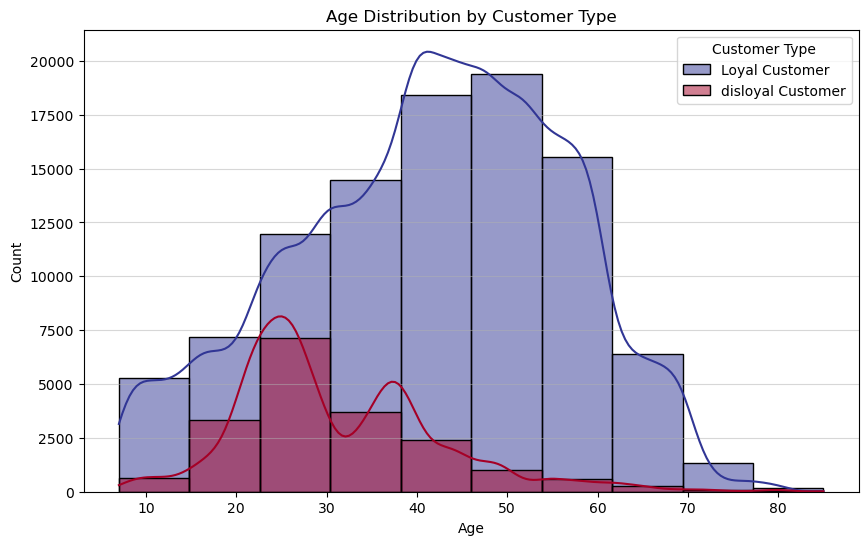

In [25]:
plt.figure(figsize=(10,6))

colors = plt.cm.RdYlBu(np.linspace(0,1, 2))[::-1]

#Loop over each Customer Type
for i, ct in enumerate(initial_df['Customer Type'].unique()):
    subset = initial_df[initial_df['Customer Type'] == ct]
    sns.histplot(
        subset['Age'],
        bins=10,
        kde=True,
        label=ct,
        color=colors[i],
        alpha=0.5
    )

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Customer Type")
plt.legend(title="Customer Type")
plt.grid(True, axis='y', alpha=0.5)
plt.show()

There are barely any disloyal customers ofer the age of 50 and most of them are between 20 and 50. This can prove to be an important criteria during the modeling part.

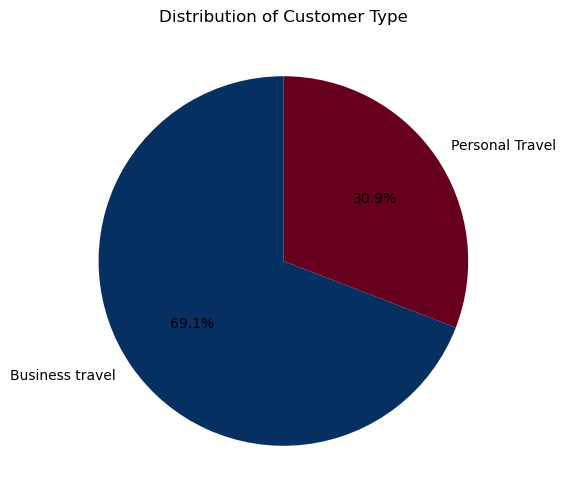

In [26]:
travel_type_counts = initial_df['Type of Travel'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    travel_type_counts,
    labels=travel_type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.RdBu(np.linspace(0, 1,2))[::-1]
)
plt.title("Distribution of Customer Type")
plt.show()

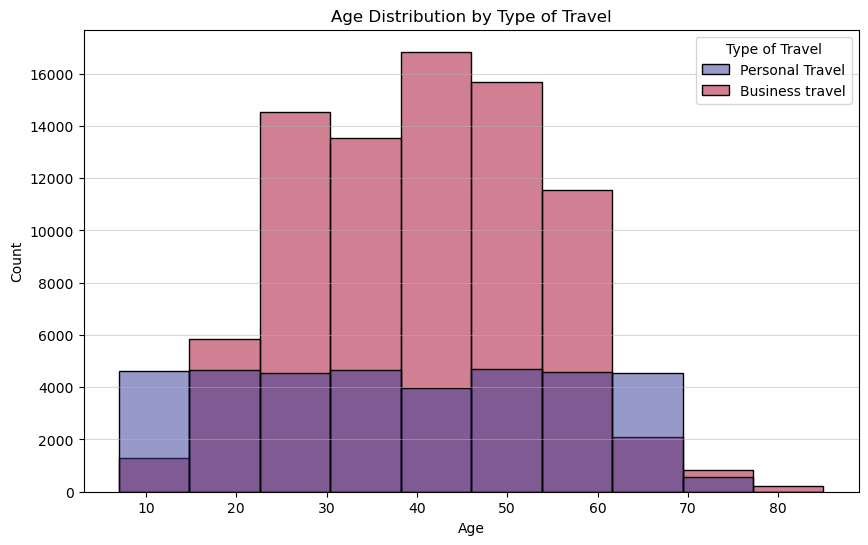

In [27]:
plt.figure(figsize=(10,6))

colors = list(plt.cm.RdYlBu(np.linspace(0,1,2))[::-1])

sns.histplot(
    data=initial_df,
    x='Age',
    hue='Type of Travel',
    bins=10,
    palette=colors,
    edgecolor='black'
)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Type of Travel")
plt.grid(True, axis='y', alpha=0.5)
plt.show()

People of all ages travel for Personal reasons while business travels are dominated by people with working age 20-60

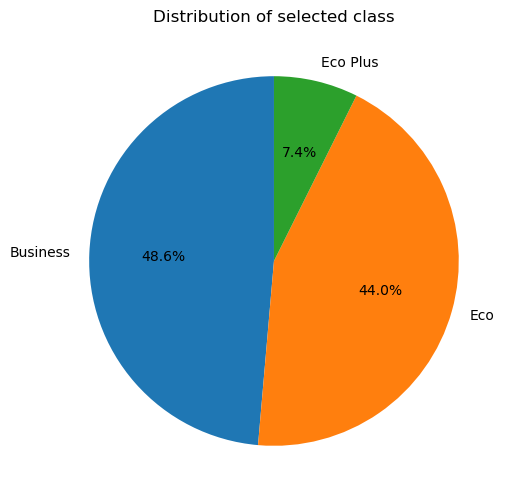

In [28]:
class_counts = initial_df['Class'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=90,
)
plt.title("Distribution of selected class")
plt.show()

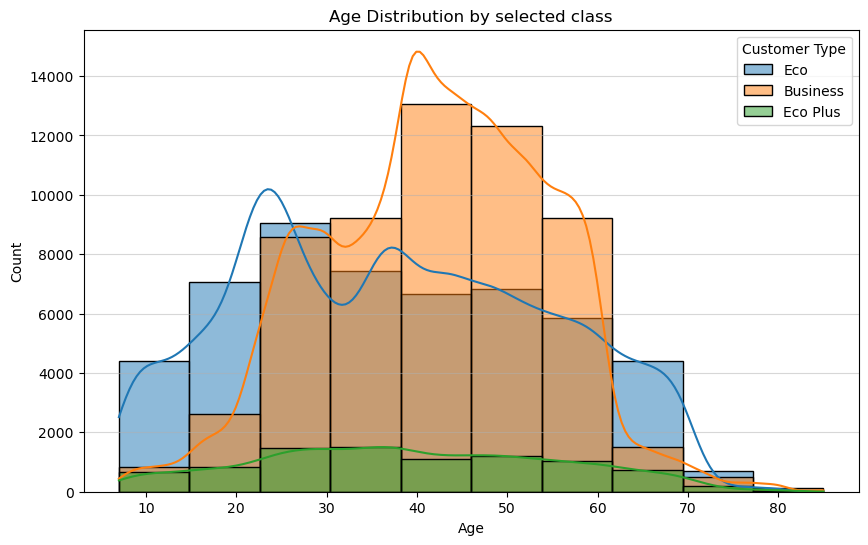

In [29]:
plt.figure(figsize=(10,6))
           
for i, ct in enumerate(initial_df['Class'].unique()):
    subset = initial_df[initial_df['Class'] == ct]
    sns.histplot(
        subset['Age'],
        bins=10,
        kde=True,
        label=ct,
        alpha=0.5
    )

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by selected class")
plt.legend(title="Customer Type")
plt.grid(True, axis='y', alpha=0.5)
plt.show()

The distribution of business class is very similar to the distribution of business related travels. This can suggest that people who travel for work related reasons also choose to fly in the business class

# SAVING FINAL DATA

In [30]:
initial_df.to_csv(r"C:\Users\YILMAZ\Desktop\final_airplane_data.csv", index=False)